# TMDB BOX Office Prediction - Linear Regression, Random Forest, XGBoost


 Hello! In this project we will be using the [TMDB Box Office](https://www.kaggle.com/c/tmdb-box-office-prediction) dataset to predict the revenue of a movie using various features like budget, popularity, runtime, release date, genre etc

This project notebook has **3** major subheadings:

**1. Data Cleaning & Preprocessing**

**2. Exploratory Data Analysis**

**3. Creating a prediction model**

We will start by analysing the data and perform data cleaning and preprocessing the features along with some feature engineering. Then we will be doing EDA using matplotlib and seaborn libraries. Finally we will use Linear Regression, Random Forest and XGBoost algorithms to make the prediction and choose the best fit for us.

Let's start by importing all the major libraries and tools.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from datetime import datetime
import os 
import datetime
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
import warnings

warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

Now let us import the required datasets into a pandas dataframe

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [5]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (3000, 23)
Test shape:  (4398, 22)


In [6]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

## Data Cleaning

In this section we be handling missing values in both numerical and categorical columns. We will also encode the categorical columns. We will also make some changes in the existing columns to use them in our prediction

### Handle null values

Checking null values

In [7]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [8]:
test.isnull().sum()


id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

For **nominal values** we can put **"None"**

In [9]:
print(test.dtypes)

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
dtype: object


In [10]:
nominal = ['genres','original_language','original_title','title' ,'spoken_languages', 'status', 'production_countries', 'production_companies', 'cast','crew']
train[nominal] = train[nominal].fillna("none")
test[nominal] = test[nominal].fillna("none")

In [11]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      0
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies        0
production_countries        0
release_date                0
runtime                     2
spoken_languages            0
status                      0
tagline                   597
title                       0
Keywords                  276
cast                        0
crew                        0
revenue                     0
dtype: int64

In [12]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                      0
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies        0
production_countries        0
release_date                1
runtime                     4
spoken_languages            0
status                      0
tagline                   863
title                       0
Keywords                  393
cast                        0
crew                        0
dtype: int64

For **release date**, we have only one null value in the test dataset. We can fill it by doing a quick **google search**

In [13]:
test[test.release_date.isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,none,none,NaN,90.0,none,none,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],none


In [14]:
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
test[test["release_date"]== '5/1/00']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
828,3829,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0210130,en,"Jails, Hospitals & Hip-Hop","Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,NaN,none,none,5/1/00,90.0,none,none,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],none
1731,4732,NaN,103000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0172495,en,Gladiator,"In the year 180, the death of emperor Marcus A...",23.186667,/6WBIzCgmDCYrqh64yDREGeDk9d3.jpg,"[{'name': 'DreamWorks SKG', 'id': 27}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de..."


For **runtime** we can replace it by the **mean** value of the other runtime values.

In [15]:
train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())


In [16]:
train.isnull().any()

id                       False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies     False
production_countries     False
release_date             False
runtime                  False
spoken_languages         False
status                   False
tagline                   True
title                    False
Keywords                  True
cast                     False
crew                     False
revenue                  False
dtype: bool

In [17]:
test.isnull().any()

id                       False
belongs_to_collection     True
budget                   False
genres                   False
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies     False
production_countries     False
release_date             False
runtime                  False
spoken_languages         False
status                   False
tagline                   True
title                    False
Keywords                  True
cast                     False
crew                     False
dtype: bool

All the null values have been taken care of !! **There are no more missing values in the dataset.**

### Changing string to list of dictionaries

Some columns have data in form of string(JSON Format). We will convert them into a list of dictionaries according to our use

In [18]:
type(train.genres[0])

str

In [19]:
dict_columns = ['genres', 'production_companies','production_countries', 'spoken_languages', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if x=='none' else eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

Now it is a list of dictionaries. We can use this in a better way

In [20]:
type(train.genres[0])

list

### Analysing Features

Lets analyze each feature one by one and check if we can make some changes

Numerical Features : Budget, Popularity, Runtime
Categorical Features : Genres, Original Language, Production Companies, Production Countries, Spoken Languages, Status

However some features like genres, spoken languages, production companies and production countries are in a complex form(list of dictionaries) and need to be treated separately

In [21]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

Lets start with the **numerical columns**

#### Budget

In [22]:
train.budget.describe()

count    3.000000e+03
mean     2.253133e+07
std      3.702609e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

The minimum value is **zero?**

In [23]:
train.budget.sort_values()

895             0
594             0
595             0
1252            0
2144            0
          ...    
1630    260000000
1425    270000000
2770    280000000
2209    300000000
2135    380000000
Name: budget, Length: 3000, dtype: int64

We see that some movies have zero value as their budgets. This does not make any sense.
we will **replace those zero values with mean**

In [24]:
train['budget'] = train['budget'].replace(0, train['budget'].mean())
test['budget'] = test['budget'].replace(0, test['budget'].mean())

In [25]:
train.budget.describe()

count    3.000000e+03
mean     2.862982e+07
std      3.458720e+07
min      1.000000e+00
25%      9.000000e+06
50%      2.253133e+07
75%      2.900000e+07
max      3.800000e+08
Name: budget, dtype: float64

#### Popularity

In [26]:
train.popularity.describe()

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64

The maximum values seems to be an outlier

In [27]:
train.popularity.sort_values(ascending = False).head(10)

518     294.337037
684     287.253654
1695    228.032744
2326    187.860492
2126    185.330992
1309    154.801009
1715    146.161786
1673    123.167259
1126     89.887648
2293     88.439243
Name: popularity, dtype: float64

After reading TMDB API Documentation on [Popularity](https://developers.themoviedb.org/3/getting-started/popularity), it seems that it is not an outlier.

#### Runtime

In [28]:
train.runtime.describe()

count    3000.000000
mean      107.856571
std        22.079069
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Again like budget, zero runtime does not make any sense. So will **replace the zero values with the mean.**

In [29]:
train['runtime'] = train['runtime'].replace(0, train['runtime'].mean())
test['runtime'] = test['runtime'].replace(0, test['runtime'].mean())

In [30]:
train.runtime.describe()

count    3000.000000
mean      108.287997
std        20.994080
min        11.000000
25%        94.000000
50%       104.500000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

#### Release Date

We can change the release_date column to datetime and form new columns like **release year, release day, release day of week** and **release month** which will be more useful for us in making prediction

In [31]:
train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)

train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)

test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)



In [32]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_month
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8
2,3,NaN,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10
3,4,NaN,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3
4,5,NaN,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2


In [33]:
train.release_year.describe()

count    3000.000000
mean     2004.579667
std        15.480790
min      1969.000000
25%      1995.000000
50%      2006.000000
75%      2012.000000
max      2068.000000
Name: release_year, dtype: float64

We need to fix release years which are **greater than 2020**

In [34]:
def fix_date(x):
    if x > 2020:
        return x - 100
    else:
        return x 

train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))

#### Genres

The values in this columns are in the form of a list of dictionaries

In [35]:
train.genres[0]

[{'id': 35, 'name': 'Comedy'}]

In [36]:
train.genres.head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

Let's check how many genres do films have

In [37]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

We can create a column - genre_count -  which shows **how many genres does a movie belongs to**

In [38]:
train['genre_count'] = train['genres'].apply(lambda x: len(x) if x!= {} else 0)

In [39]:
test['genre_count'] = test['genres'].apply(lambda x: len(x) if x!= {} else 0)

In [40]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_month,genre_count
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,4
2,3,NaN,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,1
3,4,NaN,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,2
4,5,NaN,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,2


#### Production Companies


In [41]:
train.production_companies[0]

[{'name': 'Paramount Pictures', 'id': 4},
 {'name': 'United Artists', 'id': 60},
 {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]

One movie can have multiple production companies involved. We can add a column stating the number of production companies involved.

In [42]:
train['production_companies_count'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['production_companies_count'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)

In [43]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_month,genre_count,production_companies_count
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,1,3
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,4,1
2,3,NaN,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,1,3
3,4,NaN,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,2,0
4,5,NaN,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,2,0


#### Production Countries

In [44]:
train.production_countries[1]

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

Similar to production companies, one movie can have multiple production countries involved. We can add a column stating the number of production countries involved.

In [45]:
train['production_countries_count'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['production_countries_count'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)

#### Spoken Language

In [46]:
train.spoken_languages.head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

Since one movie may contain multiple spoken languages. And a movie with more number of spoken language has a change of collecting higher revenue, We will add a column for the count of number of spoken languages in a movie

In [47]:
train['spoken_languages_count'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['spoken_languages_count'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

#### Cast and Crew

As we have been doing till now, we can simply add a column stating the cast count and crew count involved in a movie

In [48]:
train['cast_count'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
test['cast_count'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)

train['crew_count'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
test['crew_count'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)

#### Status

In [49]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [50]:
test.status.value_counts()

Released           4389
Post Production       5
Rumored               2
none                  2
Name: status, dtype: int64

We can add a is_released to column to check if the movie is released or not.

In [51]:
train['is_released'] = train['status'].apply(lambda x: 1 if x == 'Released' else 0)
test['is_released'] = test['status'].apply(lambda x: 1 if x == 'Released' else 0)

In [52]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_year,release_day,release_month,genre_count,production_companies_count,production_countries_count,spoken_languages_count,cast_count,crew_count,is_released
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.00,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,1,3,1,1,24,72,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,4,1,1,1,20,9,1
2,3,NaN,3300000.00,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,1,3,1,1,51,64,1
3,4,NaN,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,2,0,1,2,7,3,1
4,5,NaN,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,2,0,1,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,22531334.11,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1994-04-22,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name':

#### Original Language

 It is a simple categorical column, so we can encode it

In [53]:
train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64

In [54]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train['original_language'].values.reshape(-1,1))


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [55]:
encoded_cols = list(encoder.get_feature_names(['original_language']))
print(encoded_cols)

['original_language_ar', 'original_language_bn', 'original_language_cn', 'original_language_cs', 'original_language_da', 'original_language_de', 'original_language_el', 'original_language_en', 'original_language_es', 'original_language_fa', 'original_language_fi', 'original_language_fr', 'original_language_he', 'original_language_hi', 'original_language_hu', 'original_language_id', 'original_language_it', 'original_language_ja', 'original_language_ko', 'original_language_ml', 'original_language_mr', 'original_language_nb', 'original_language_nl', 'original_language_no', 'original_language_pl', 'original_language_pt', 'original_language_ro', 'original_language_ru', 'original_language_sr', 'original_language_sv', 'original_language_ta', 'original_language_te', 'original_language_tr', 'original_language_ur', 'original_language_vi', 'original_language_zh']


In [56]:
train[encoded_cols] = encoder.transform(train[['original_language']])

In [57]:
test[encoded_cols] = encoder.transform(test[['original_language']])

### Drop Unnecessary Columns
There are some columns which we can exclude for now

In [58]:
exclude = ['belongs_to_collection', 'homepage' ,'imdb_id', 'overview', 'poster_path', 'tagline', 'Keywords']
train = train.drop(exclude, axis = 1)
test = test.drop(exclude, axis = 1)

In [59]:
train.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue', 'release_year', 'release_day',
       'release_month', 'genre_count', 'production_companies_count',
       'production_countries_count', 'spoken_languages_count', 'cast_count',
       'crew_count', 'is_released', 'original_language_ar',
       'original_language_bn', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fa',
       'original_language_fi', 'original_language_fr', 'original_language_he',
       'original_language_hi', 'original_language_hu', 'original_language_id',
       'original_language_it', 'original_language_ja', 'original_language_ko',
       'original_language_ml', 'original_

In [60]:
train

,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,revenue,release_year,release_day,release_month,genre_count,production_companies_count,production_countries_count,spoken_languages_count,cast_count,crew_count,is_released,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_id,original_language_it,original_language_ja,original_language_ko,original_language_ml,original_language_mr,original_language_nb,original_language_nl,original_language_no,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,1,14000000.00,"[{'id': 35, 'name': 'Comedy'}]",en,Hot Tub Time Machine 2,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,1,3,1,1,24,72,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,40000000.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,The Princess Diaries 2: Royal Engagement,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,4,1,1,1,20,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3300000.00,"[{'id': 18, 'name': 'Drama'}]",en,Whiplash,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,1,3,1,1,51,64,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1200000.00,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,Kahaani,3.174936,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,2,0,1,2,7,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,22531334.11,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,마린보이,1.148070,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,2,0,1,1,4,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [61]:
test

,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,release_year,release_day,release_month,genre_count,production_companies_count,production_countries_count,spoken_languages_count,cast_count,crew_count,is_released,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_id,original_language_it,original_language_ja,original_language_ko,original_language_ml,original_language_mr,original_language_nb,original_language_nl,original_language_no,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,3001,2.264929e+07,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,ディアルガVSパルキアVSダークライ,3.851534,{},"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Pokémon: The Rise of Darkrai,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",2007,5,7,4,0,2,2,7,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3002,8.800000e+04,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Attack of the 50 Foot Woman,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",1958,6,5,2,1,1,1,10,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3003,2.264929e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Addicted to Love,"[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",1997,4,5,2,3,1,1,9,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3004,6.800000e+06,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Incendies,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",2010,5,9,3,3,2,3,23,69,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3005,2.000000e+06,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,Inside Deep Throat,3.217680,{},"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside Deep Throat,"[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",2005,4,2,2,0,1,1,4,14,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

We are done with data cleaning and preprocessing. We have imputed missing values, encoded categorical columns, modified some columns and even created new columns using the existing features. Lets move on to some visualization!

## Exploratory Data Analysis

In this section we will try to visualize the dataset using various plots and try to learn and improve as much as we can

Let's start by plotting the revenue a

<AxesSubplot:xlabel='budget', ylabel='Density'>

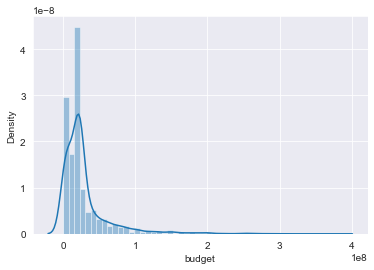

In [62]:
sns.distplot(train.budget)

As we can see the data is highly right-skewed. We can  perform log transform in order to convert it to a normal distribution.

In [63]:
train['log_revenue'] = np.log(train['revenue'])

<AxesSubplot:xlabel='log_revenue', ylabel='Density'>

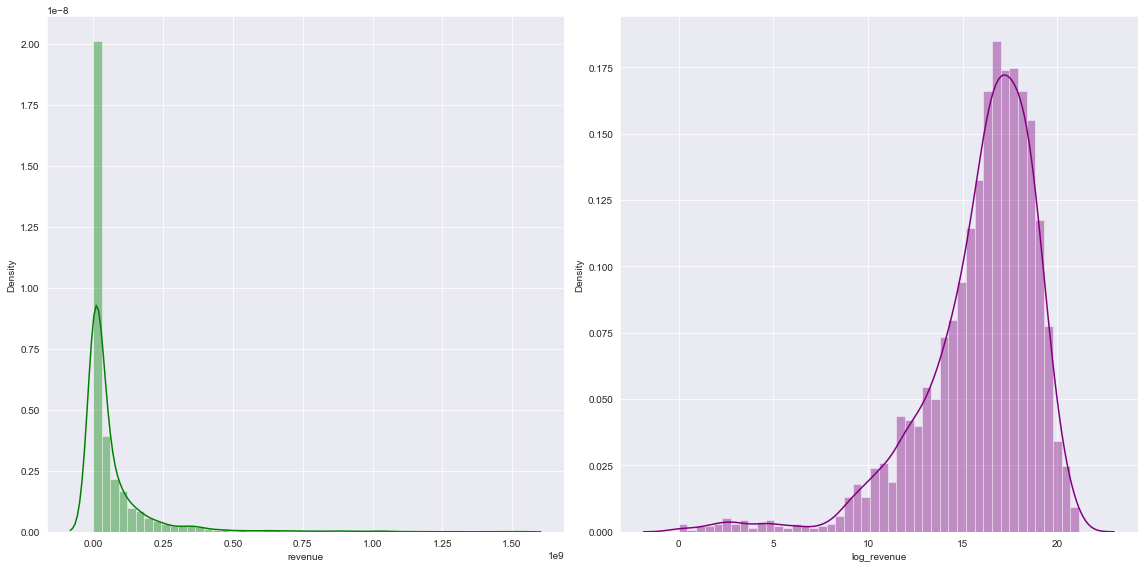

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (16, 8), tight_layout=True)

sns.distplot(train.revenue, ax=ax[0], color='green')
sns.distplot(train.log_revenue, ax=ax[1], color='purple')

#### Correlation Heatmap

A Correlation heatmap can give us a good idea about the features which are more closely related to revenue

In [65]:
train.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue', 'release_year', 'release_day',
       'release_month', 'genre_count', 'production_companies_count',
       'production_countries_count', 'spoken_languages_count', 'cast_count',
       'crew_count', 'is_released', 'original_language_ar',
       'original_language_bn', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fa',
       'original_language_fi', 'original_language_fr', 'original_language_he',
       'original_language_hi', 'original_language_hu', 'original_language_id',
       'original_language_it', 'original_language_ja', 'original_language_ko',
       'original_language_ml', 'original_

<AxesSubplot:>

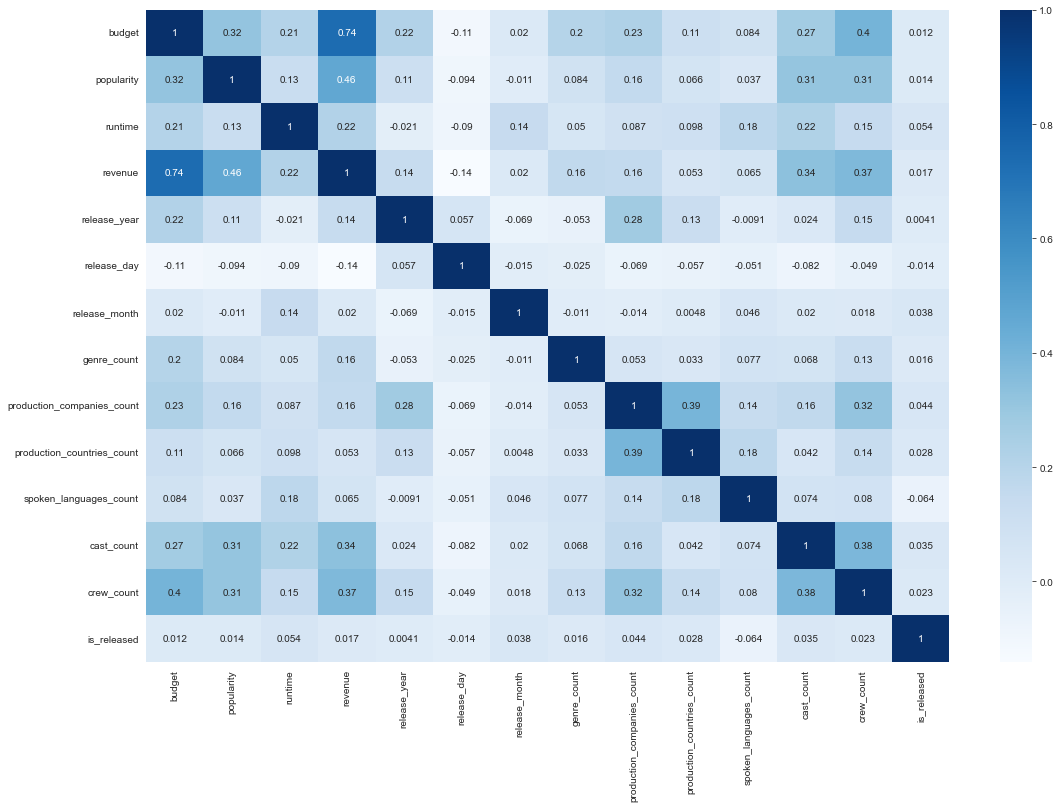

In [66]:
my_cols =['budget', 'genres', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue', 'release_year', 'release_day',
       'release_month', 'genre_count', 'production_companies_count',
       'production_countries_count', 'spoken_languages_count', 'cast_count',
       'crew_count', 'is_released']
plt.figure(figsize = (18,12))
sns.heatmap(train[my_cols].corr(),annot = True,cmap = 'Blues')

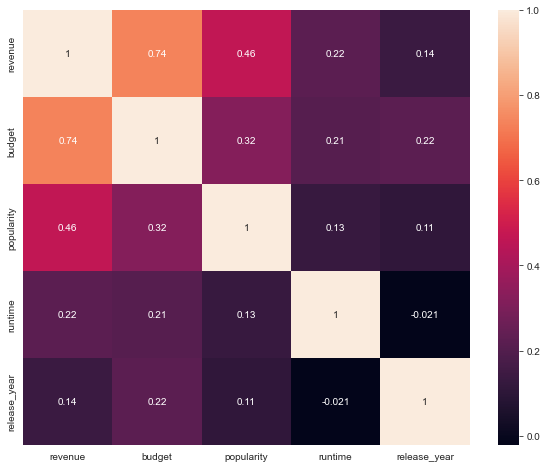

In [67]:
cols =['revenue','budget','popularity','runtime','release_year']
plt.figure(figsize = (10,8))
sns.heatmap(train[cols].corr(),annot = True)
plt.show()

It turns out that Budget and Popularity are highly correlated to the revenue earned by the movie. This is understandable.

Since revenue is closely related to the budget of the movie, let us plot revenue vs budget scatter plot and visualize the relation

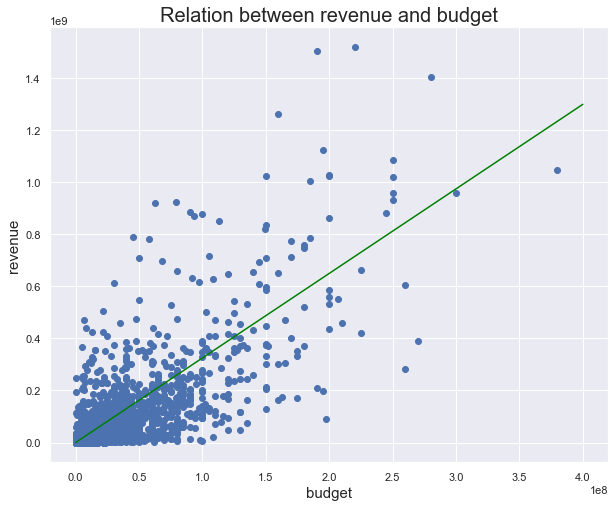

In [68]:
sns.set()
x = np.array(train["budget"])
y = np.array(train["revenue"])
fig = plt.figure(1, figsize=(10, 8))
plt.plot([0,400000000],[0,1300000000],c="green")
plt.scatter(x, y,marker='o')
plt.xlabel("budget", fontsize=15)  
plt.ylabel("revenue", fontsize=15)
plt.title("Relation between revenue and budget", fontsize=20)
plt.show()

We can also plot revenue vs popularity and revenue vs runtime 

Text(0.5, 1.0, 'Revenue vs Runtime')

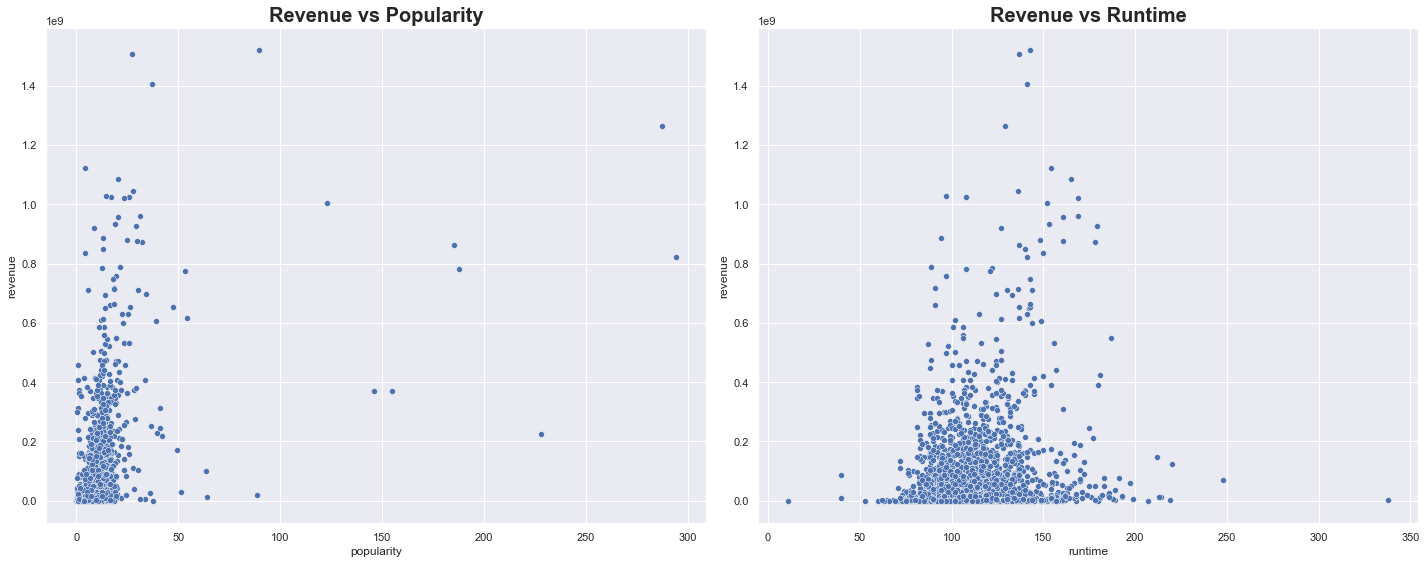

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8), tight_layout=True)

sns.scatterplot(ax=ax[0], x=train.popularity, y=train.revenue).set_title('Revenue vs Popularity', fontweight="bold", size = 20)
sns.scatterplot(ax=ax[1], x=train.runtime, y=train.revenue).set_title('Revenue vs Runtime', fontweight="bold", size = 20)


Now lets see the trend over the years

Number of movies released every year

Text(0.5, 1.0, 'Number of movies released every year')

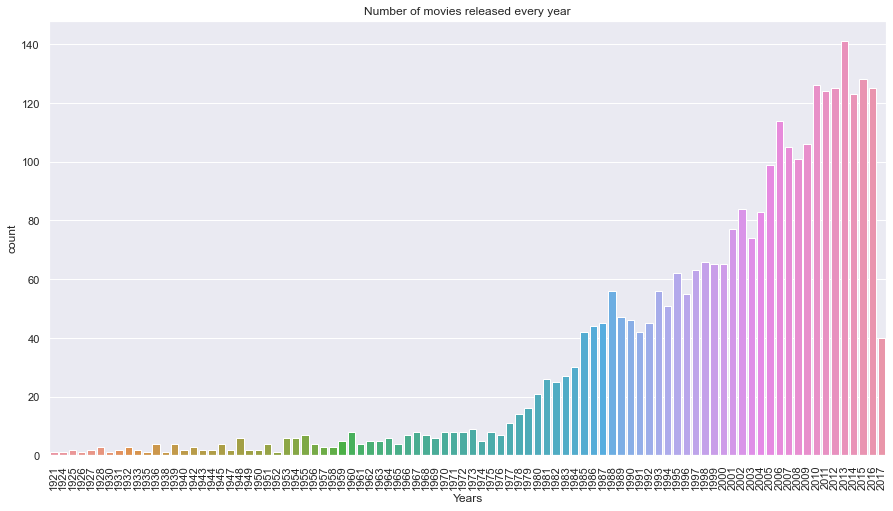

In [70]:
plt.figure(figsize=(15,8))
sns.countplot(train.release_year)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Number of movies released every year')

Let us visualize the trend of revenue and budget over the years

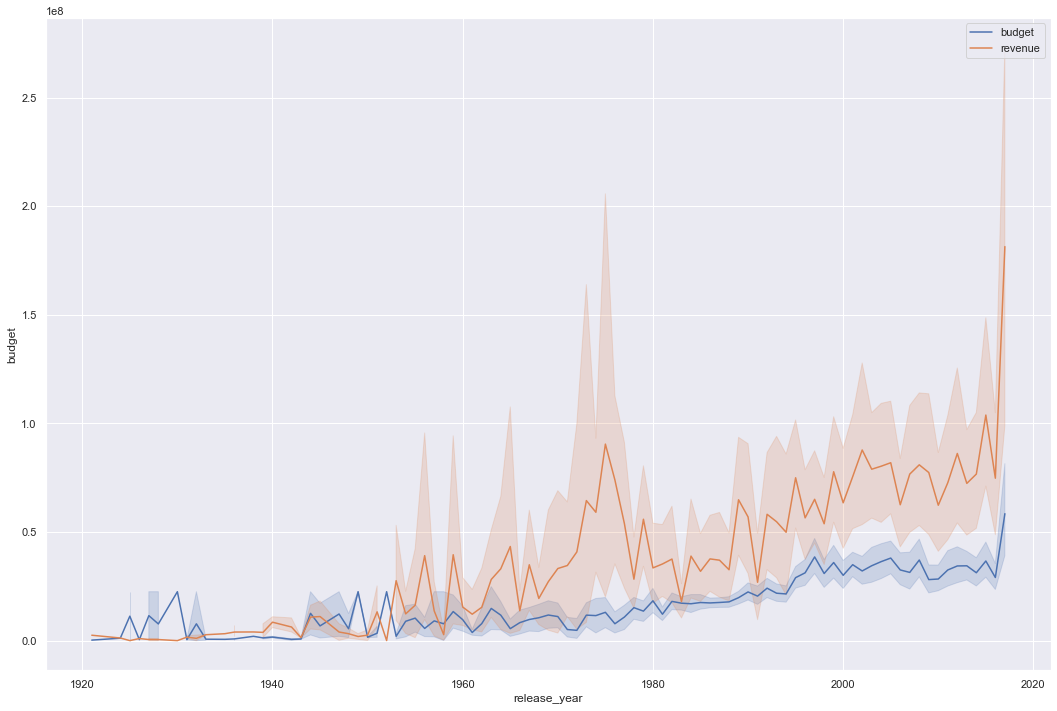

In [71]:
plt.figure(figsize= (18,12))
sns.lineplot(x='release_year',y='budget',data = train,label = 'budget')
sns.lineplot(x='release_year',y='revenue',data = train,label = 'revenue')

plt.legend()
plt.show()

Above lineplot also shows a direct relation between the budget and revenue of the movie.

Finally we are done withe the Exploratory Data Analysis. Now we will move on the fit the perfect model on our data and use it to make predictions

## Creating a prediction model 

First we will create X and y where X will contain all the features which we will feed to our model and y will contain the target. We will be using log_revenue as our target variable

In [72]:
train.columns

Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'revenue', 'release_year', 'release_day',
       'release_month', 'genre_count', 'production_companies_count',
       'production_countries_count', 'spoken_languages_count', 'cast_count',
       'crew_count', 'is_released', 'original_language_ar',
       'original_language_bn', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fa',
       'original_language_fi', 'original_language_fr', 'original_language_he',
       'original_language_hi', 'original_language_hu', 'original_language_id',
       'original_language_it', 'original_language_ja', 'original_language_ko',
       'original_language_ml', 'original_

In [73]:
drop_cols = ['id', 'genres', 'original_language', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title', 'cast', 'crew', 'revenue', 'log_revenue']
X = train.drop(drop_cols, axis = 1)
y = train.log_revenue
drop_cols.remove('revenue')
drop_cols.remove('log_revenue')
X_test = test.drop(drop_cols, axis = 1)


Now we will split our train data into train and validation sets.

In [74]:
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=69)

In [75]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2400, 49), (600, 49), (2400,), (600,))

For our convinience, let us define a function score, which will give us the score of a particular model. This will help us in comparing the models.

We will be using three scores for our evaluation criteria : 
1. Mean Absolute Error(MAE)
2. Root Mean Squared Error(RMSE)
3. R2 Score

In [76]:
def score(model, title):
    model.fit(X_train,y_train)
    model_pred = model.predict(X_val)
    print('MAE for', title, 'model is: ', mean_absolute_error(y_val, model_pred))
    print('RMSE for', title, 'model is: ', mean_squared_error(y_val, model_pred, squared = False))
    print('r2 score for', title, 'model is: ', r2_score(y_val, model_pred))
    print('Something(score mp) for', title, 'model is: ', model.score(X_train, y_train))

We will start by fitting the most basic model - Linear Regression

In [78]:
linear_regression=LinearRegression()
score(linear_regression, 'Linear Regression')


MAE for Linear Regression model is:  1.9258438855536129
RMSE for Linear Regression model is:  2.851736918846547
r2 score for Linear Regression model is:  0.23462741925337094
Something(score mp) for Linear Regression model is:  0.297045858054901


Linear Regression performed poorly. Let us try Random Forest Regressor

In [80]:
rf_model = RandomForestRegressor(random_state=42, 
                                  max_features='auto', 
                                  n_estimators= 50, 
                                  min_samples_leaf=2 )
score(rf_model, 'Random Forest Regressor')

MAE for Random Forest Regressor model is:  1.3885640338708969
RMSE for Random Forest Regressor model is:  2.109347818666684
r2 score for Random Forest Regressor model is:  0.5812542812219682
Something(score mp) for Random Forest Regressor model is:  0.872476369777103


The score has improved Let us also check XGBoost Regressor

In [81]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:linear',
                                  eta = 0.01,
                                  max_depth = 3,
                                  min_child_weight = 3,
                                  subsample = 0.8,
                                  gamma = 1.45,
                                  colsample_bytree = 0.7,
                                  eval_metric = 'rmse',
                                  seed = 42,
                                  n_estimators = 3000)

In [82]:
%%time
score(xgb_model, 'XGBoost')


[00:47:26] WARNING: d:\bld\xgboost-split_1645118015404\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
MAE for XGBoost model is:  1.4489522621979352
RMSE for XGBoost model is:  2.1680201812024045
r2 score for XGBoost model is:  0.5576351360396573
Something(score mp) for XGBoost model is:  0.7377339982235736
CPU times: total: 29.2 s
Wall time: 2.87 s


It seems that the Random Forest Regressor is giving us the best results. So we will fit out data on this model to make the final predictions on the test data


In [83]:
rf_model.fit(X,y)


RandomForestRegressor(min_samples_leaf=2, n_estimators=50, random_state=42)

In [84]:
test


,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,cast,crew,release_year,release_day,release_month,genre_count,production_companies_count,production_countries_count,spoken_languages_count,cast_count,crew_count,is_released,original_language_ar,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_id,original_language_it,original_language_ja,original_language_ko,original_language_ml,original_language_mr,original_language_nb,original_language_nl,original_language_no,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,3001,2.264929e+07,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,ディアルガVSパルキアVSダークライ,3.851534,{},"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Pokémon: The Rise of Darkrai,"[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",2007,5,7,4,0,2,2,7,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3002,8.800000e+04,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,Attack of the 50 Foot Woman,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Attack of the 50 Foot Woman,"[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de...",1958,6,5,2,1,1,1,10,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3003,2.264929e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,Addicted to Love,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Addicted to Love,"[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de...",1997,4,5,2,3,1,1,9,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3004,6.800000e+06,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,Incendies,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Incendies,"[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de...",2010,5,9,3,3,2,3,23,69,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3005,2.000000e+06,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,Inside Deep Throat,3.217680,{},"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Inside Deep Throat,"[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de...",2005,4,2,2,0,1,1,4,14,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [85]:
print(test.columns, test.shape)
drop_cols_test = ['id', 'genres', 'original_language', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title', 'cast', 'crew']

test = test.drop(drop_cols_test, axis = 1)
print(test.columns, test.shape)


Index(['id', 'budget', 'genres', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'title',
       'cast', 'crew', 'release_year', 'release_day', 'release_month',
       'genre_count', 'production_companies_count',
       'production_countries_count', 'spoken_languages_count', 'cast_count',
       'crew_count', 'is_released', 'original_language_ar',
       'original_language_bn', 'original_language_cn', 'original_language_cs',
       'original_language_da', 'original_language_de', 'original_language_el',
       'original_language_en', 'original_language_es', 'original_language_fa',
       'original_language_fi', 'original_language_fr', 'original_language_he',
       'original_language_hi', 'original_language_hu', 'original_language_id',
       'original_language_it', 'original_language_ja', 'original_language_ko',
       'original_language_ml', 'original_language_mr

In [86]:
rf_full = xgb_model.predict(test)

In [87]:
rf_full = np.array(rf_full, dtype=np.float)

In [88]:
rf_full = np.expm1(rf_full)

In [89]:
rf_full

array([  727018.01838272,  4798260.71206103,  4881213.67396712, ...,
       78621423.80048373,  8610930.44805914,   993939.85653277])

These are our final predictions on the test data

submission['revenue'] = rf_full
submission.to_csv("rf.csv", index=False)

!kaggle competitions submit tmdb-box-office-prediction -f rf.csv -m "second submission"